<a href="https://colab.research.google.com/github/chowravc/YOLOv5DefectDetection/blob/main/YOLOv5_Defect_Detection_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for Defect Detections with YOLOv5

Ravin Chowdhury

Soft Materials Research Center and Department of Physics,

University of Colorado Boulder


---



This notebook is a demonstration of YOLOv5 for defect detection in liquid crystal films.

YOLOv5 was developed by ultralytics.

[Ultralytics YOLOv5](https://github.com/ultralytics/yolov5)



## Using this notebook

1. Make sure you are logged in to Google and copy the notebook to your drive.



2. Change to GPU runtime before running this notebook.

  In the toolbar,

  Runtime -> Change Runtime type -> Hardware Accelerator -> GPU



3. (Optional) If you want to store the output to your Google Drive, go to the left bar and:

  Files -> Mount Drive

  Follow the Colab authorization steps to mount your drive.

  In the 'YOLOv5 Setup' section, you can change the directory to perform detections.

4. If you want to run this model on your own images, an upload method will be prompted while running the 'YOLOv5 Setup' section. Multiselect images and they will automatically be uploaded. Select cancel upload if you want to use demo images.

# YOLOv5 Setup

In [1]:
%load_ext autoreload
%autoreload 2

# %cd '/content/drive/MyDrive/' # Choose directory to perform detections in (optional)

print('\nCloning Relevant Data..\n')
!sudo apt-get install git-lfs
!git lfs clone https://github.com/chowravc/YOLOv5DefectDetection # clone YOLOv5 weights for defects

%cd YOLOv5DefectDetection
%cd yolov5

!pip install -r requirements.txt  # install dependencies
!pip install trackpy
!pip install Pillow

import os
import torch
import PIL
from IPython.display import Image, clear_output  # to display images
import matplotlib as mpl
import matplotlib.pyplot as plt
os.mkdir('images')
%cd images

clear_output()
print('\nUpload Images..\n')
from google.colab import files
uploaded = files.upload()

%cd ..

# !bash weights/download_weights.sh # download weights (not required)
#!pip install wandb (display progress in wandb, not required)

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# YOLOv5 Detections

Change --img-size to roughly the dimensions of the images.

This notebook uses the best trained model for defect detection.

## Demo Images

Run this script if you did not upload any images of your own.

The output gets saved to "content/YOLOv5DefectDetection/yolov5/runs/detect/exp*/" with * denoting the detection run number. If this is your first run, it will be 'exp'.

### Run Detection

In [2]:
!python detect.py --source '/content/YOLOv5DefectDetection/yolov5/demo_images' --weights runs/train/exp13/weights/best.pt --iou-thres 0.0 --img-size 1024 --max-det 1000 --conf-thres 0.25 --save-txt --save-conf

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=1024, iou_thres=0.0, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=True, save_crop=False, save_txt=True, source='/content/YOLOv5DefectDetection/yolov5/demo_images', update=False, view_img=False, weights=['runs/train/exp13/weights/best.pt'])
YOLOv5 🚀 3385d89 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 392 layers, 46600566 parameters, 0 gradients, 114.1 GFLOPS
image 1/5 /content/YOLOv5DefectDetection/yolov5/demo_images/r2_0200.tif: 768x1024 395 ds, Done. (0.079s)
image 2/5 /content/YOLOv5DefectDetection/yolov5/demo_images/r2_2000.tif: 768x1024 50 ds, Done. (0.036s)
image 3/5 /content/YOLOv5DefectDetection/yolov5/demo_images/r2_3000.tif: 768x1024 38 ds, Done. (0.036s)
image 4/5 /content/YOLOv5DefectDetection/yolov5/demo_images/r2_4000.tif: 768x1024 29 ds, Done. 

### View Image output

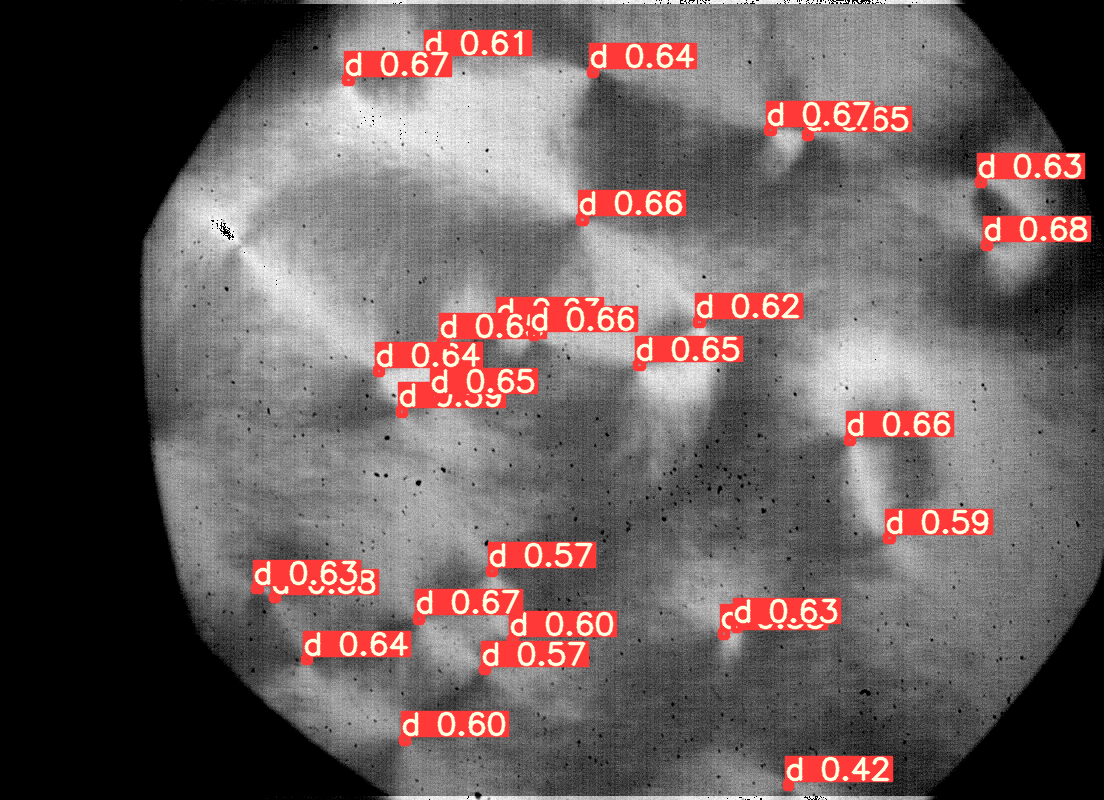

In [3]:
imageToDisplay = 'runs/detect/exp/r2_4000.tif' # Change this to any other image in the demo

# Converting image, .tif does not work
pngImage = imageToDisplay.split('.')[0]+'.png'
im = PIL.Image.open(imageToDisplay)
im.save(pngImage)

Image(pngImage)

## Uploaded Images

Run this script if you want to run detections on your own uploaded images.

The output gets saved to "content/YOLOv5DefectDetection/yolov5/runs/detect/exp*/" with * denoting the detection run number. If this is your first run, it will be 'exp'.

### Run Detection

In [ ]:
!python detect.py --source '/content/YOLOv5DefectDetection/yolov5/images' --weights runs/train/exp13/weights/best.pt --iou-thres 0.0 --img-size 1024 --max-det 1000 --conf-thres 0.25 --save-txt --save-conf

### View Image output

In [ ]:
imageToDisplay = 'runs/detect/exp/xxx' # Change the xxx to image output

# Converting image, .tif does not work
pngImage = imageToDisplay.split('.')[0]+'.png'
im = PIL.Image.open(imageToDisplay)
im.save(pngImage)

Image(pngImage)

# Better outputs with Matplotlib

To better visualise the large number of detections, we use Matplotlib. The script plot_results_mpl.py is used to do this.

## Test (if you haven't run detections)

Here we can use the default parameters in the script.

Labeled image saved to: demo_images/r2_0200_labeled.png


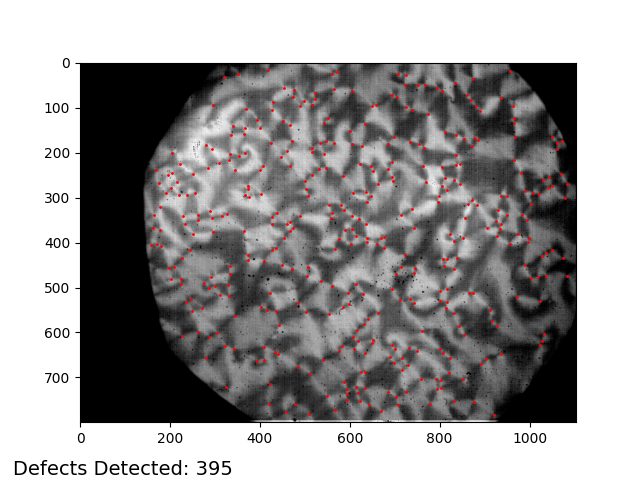

In [4]:
!python plot_results_mpl.py

Image('demo_images/r2_0200_labeled.png')

## Displaying your detections

Here we use must manually specify what labels, image and other parameters we want the script to use.

    --label : path to label generated by YOLOv5
    --image : path to image detection was performed on
    --xdim : x-value, 'width' of image in pixels
    --ydim : y-value, 'height' of image in pixels
    --save : path to where the labeled image should be saved
    --dpi : choose custom dpi for saved image

In [4]:
!python plot_results_mpl.py --label 'runs/detect/exp/labels/r2_0200.txt' --image 'demo_images/r2_0200.tif' --xdim 1104 --ydim 800 --save 'demo_images/r2_0200_labeled.png' --dpi 200

Labeled image saved to: demo_images/r2_0200_labeled.png


The output should tell you the path to where the labelled image was saved (you would have inputted that in the last cell).

Change 'labeledImg' to that path.

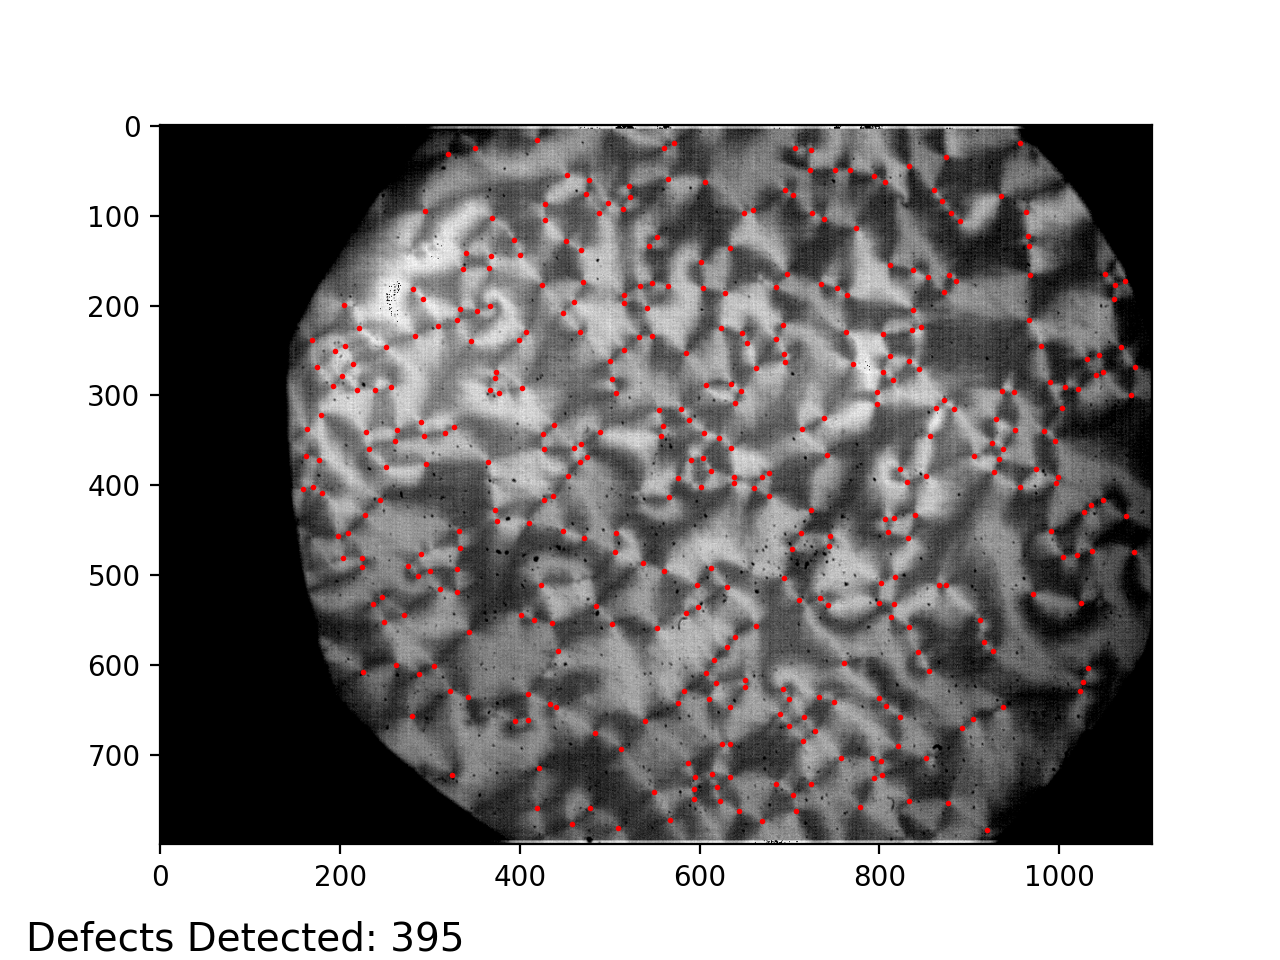

In [5]:
labeledImg = 'demo_images/r2_0200_labeled.png'

Image(labeledImg)